# Exploratory Data Analysis

## Objective
Find meaningfull insights from the data. Look for any patterns in the data that might aid the machine learning process.

# 1 Import Data

## 1.1 Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast
import gensim

## 1.2 Load Data

In [5]:
train = pd.read_csv("train_clean.csv")
val = pd.read_csv("val_clean.csv")
explore = pd.concat([train, val])

explore.head()

,text,real_news,tokens
0,upset at trump mexico voices worry and irritat...,1,"['upset', 'trump', 'mexico', 'voic', 'worri', ..."
1,watch obama directly calls trump out for cari...,0,"['watch', 'obama', 'directli', 'call', 'trump'..."
2,trump lawyer says president not informed he is...,1,"['trump', 'lawyer', 'say', 'presid', 'inform',..."
3,trump names interim consumer agency head likel...,1,"['trump', 'name', 'interim', 'consum', 'agenc'..."
4,johnny depp goes off on donald trump he’s ‘a ...,0,"['johnni', 'depp', 'goe', 'donald', 'trump', '..."


# 2 Explore Most Common Words

## 2.1 Most Common Words Overall

First I will create a function to get a list of all the words in given a dataframe.

In [15]:
def total_words(dataframe):
    words = []
    for val in dataframe.tokens.values:
        token_list = ast.literal_eval(val)
        for word in token_list:
            words.append(word)
        
    return words

In [25]:
fake_words = total_words(explore[explore.real_news==0])
real_words = total_words(explore[explore.real_news==1])

Next I will create a function to display a word cloud given a list of words.

In [34]:
def to_wordcloud(list_of_words):
    
    string_of_words = " ".join(list_of_words)
    
    wc = WordCloud(width = 3000, height = 2000)
    
    plt.imshow(wc.generate(string_of_words), interpolation="bilinear")
    plt.tight_layout(pad=0)
    plt.show()

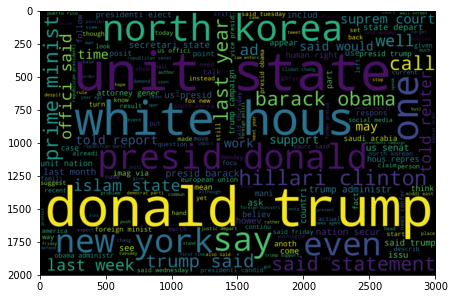

In [35]:
to_wordcloud(fake_words + real_words)

## 2.2 Most Common Words In Fake News

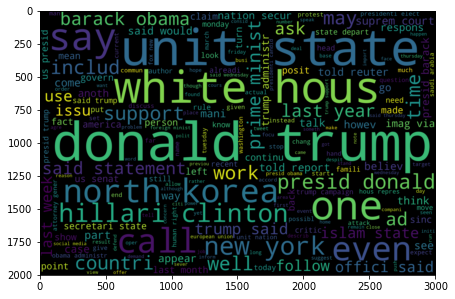

In [38]:
to_wordcloud(fake_words)

## 2.3 Most Common Words In Real News

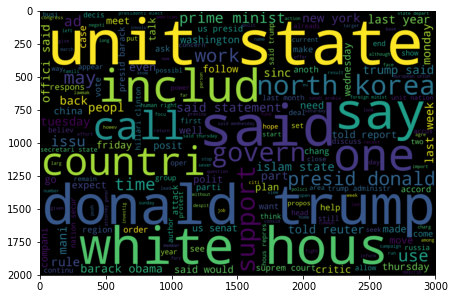

In [39]:
to_wordcloud(real_words)

# 3 Explore Vocabulary Size

## 3.1 Difference In Total Vocabulary Size With Fake Vs Real

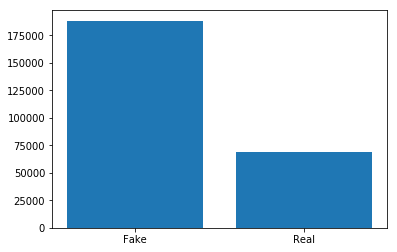

In [37]:
fake_news_vocab_size = len(list(set(fake_words)))
real_news_vocab_size = len(list(set(real_words)))

plt.bar(["Fake", "Real"], [fake_news_vocab_size, real_news_vocab_size])
plt.show()

It seems fake news has a larger total vocabulary.

## 3.2 Difference In Average Vocabulary Size

I will first make a function to get the average vocabulary size given a dataframe.

In [40]:
def get_avg_vocab(dataframe):
    summation = 0
    for val in dataframe.tokens.values:
        token_list = ast.literal_eval(val)
        summation += len(list(set(token_list)))
        
    return summation / len(dataframe)

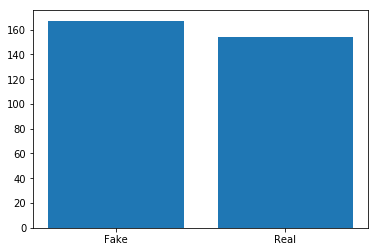

In [41]:
plt.bar(["Fake", "Real"], [get_avg_vocab(explore[explore.real_news==0]), get_avg_vocab(explore[explore.real_news==1])])
plt.show()

The average amount of unique words used per an article seems to not differ much between fake and real news.

# 4 Word 2 Vec

## 4.1 Create Word Vectors

In [ ]:
dimensions = 100
w2v = gensim.Word2Vec()